In [103]:
!pip install tensorflow


#### Dataset is about if customer is quiting the bank or not

In [104]:
import tensorflow as tf 
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(65.256256, shape=(), dtype=float32)


In [105]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [106]:
print(tf.__version__)

2.12.0


In [107]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [109]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
# Split the dataset in dependent and independent features
X = dataset.iloc[:,3:13]  # RowNumber, customerId and Surname is not important here
y = dataset.iloc[:,13]

In [111]:
print('X features', X.head())


X features    CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


In [112]:
print('y feature', y.head())

y feature 0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [113]:
# Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)   #drop_first drops first column and shows other two columns, if first column is there it will show 0 for other 2 columns
gender = pd.get_dummies(X['Gender'],drop_first=True)


In [114]:
# Concanate these features with original dataset
X = X.drop(['Geography','Gender'], axis=1) # first drop columns not needed here geography column created with feature engineering


In [115]:
X = pd.concat([X,geography,gender], axis=1)

In [116]:
# Spliting the dataset into Trianing and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [117]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
X_train.shape

(8000, 11)

In [119]:
# Lets create th ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [120]:
# Initialise the ANN
classifier = Sequential()

In [121]:
# Add the input layer
classifier.add(Dense(units = 11, activation = 'relu')) # units = 11 because our dataset has 11 inputs


In [122]:
# Adding first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dropout(0.2))

In [123]:
# Adding second hidden layer
classifier.add(Dense(units = 6, activation ='relu'))
classifier.add(Dropout(0.3))

In [124]:
# Adding the output layer
classifier.add(Dense(1,activation = 'sigmoid'))

In [125]:
classifier.compile(optimizer='adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [126]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [127]:
## Early stopping
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [128]:
# Train the model
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.5678 - accuracy: 0.7774 - val_loss: 0.4711 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4769 - accuracy: 0.7949 - val_loss: 0.4415 - val_accuracy: 0.7974
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.8001 - val_loss: 0.4301 - val_accuracy: 0.8020
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.8046 - val_loss: 0.4175 - val_accuracy: 0.8129
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4256 - accuracy: 0.8160 - val_loss: 0.4036 - val_accuracy: 0.8224
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8233 - val_loss: 0.3922 - val_accuracy: 0.8296
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.4048 - accuracy: 0.8330 - val_loss: 0.3839 - val_accuracy:

In [129]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

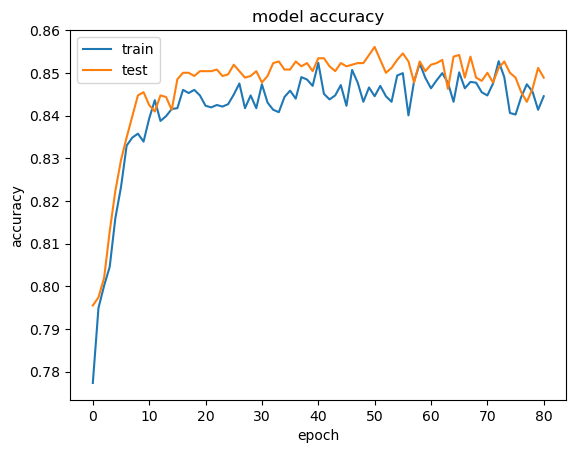

In [130]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

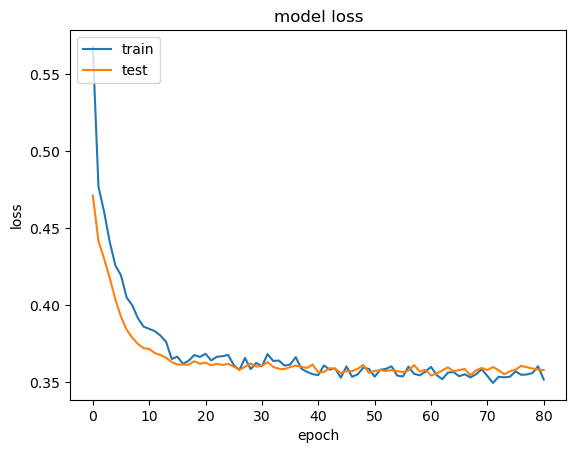

In [131]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [132]:
#Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [133]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1551,   44],
       [ 228,  177]], dtype=int64)

In [134]:
# calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.864

In [135]:
# get the weights
classifier.get_weights()

[array([[-0.10388856,  0.2663123 ,  0.01592066,  0.02718878,  0.18710914,
          0.1866707 , -0.17722736, -0.0934173 ,  0.02899849,  0.02342075,
          0.18078709],
        [-0.2782781 ,  0.4518936 ,  0.2608599 , -0.9962287 , -0.05910594,
          0.25602788,  0.30085233, -0.6073115 ,  0.04586725,  0.49583635,
          0.3383977 ],
        [ 0.04439367,  0.22727726,  0.13388953,  0.02767372, -0.14233702,
         -0.1060189 , -0.21326892, -0.30349848, -0.08262709, -0.24133322,
          0.35654286],
        [-0.81694895, -0.35634473, -0.4744143 ,  0.02021589,  0.07376603,
         -0.55282724,  0.5566044 , -0.7799444 ,  0.15146087,  0.8109835 ,
          0.5267162 ],
        [-0.19089435, -0.10815969, -1.1329364 ,  0.13867715, -1.0940863 ,
          0.03423579, -0.82332176,  0.4231657 ,  1.22905   ,  0.2671525 ,
          0.10133717],
        [-0.2818143 ,  0.01960706, -0.04898877, -0.09477287, -0.26973027,
         -0.05126682, -0.26769766, -0.14771387, -0.06785186, -0.1867328